### mid 2 past

In [ ]:
# (a) Drop unnecessary columns
cols_to_drop = ['Name', 'Ticket', 'Cabin']
train_data.drop(cols_to_drop, axis=1, inplace=True)

# (b) Create dummy variables for specified columns and then drop the original columns
cols_for_dummies = ['Pclass', 'Sex', 'Embarked']
train_data = pd.get_dummies(train_data, columns=cols_for_dummies, drop_first=True)

# (c) Fill missing age values using interpolation
train_data['Age'] = train_data['Age'].interpolate()

# (d) Sort by 'Survived' in ascending order
train_data_sorted = train_data.sort_values(by='Survived')

## q# 2 past mid

# Define the features and target
features = iris_df[['Sepal_length', 'Sepal_width', 'Petal_width']]
target = iris_df['Species']

# Encode the categorical target variable
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# Apply K-NN classifier
knn_accuracies = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    cv_scores = cross_val_score(knn, features, target_encoded, cv=5)
    knn_accuracies.append(cv_scores.mean())

# Find the highest accuracy and the corresponding K
highest_accuracy = max(knn_accuracies)
best_k = knn_accuracies.index(highest_accuracy) + 1  # Adding 1 because index starts at 0


# Applying K-NN with Manhattan distance and 5-fold Cross-validation
kf = KFold(n_splits=5, random_state=7, shuffle=True)
highest_accuracy = 0
best_k = 0

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    cv_scores = cross_val_score(knn, iris_features, iris_labels, cv=kf, scoring='accuracy')
    mean_cv_scores = np.mean(cv_scores)
    if mean_cv_scores > highest_accuracy:
        highest_accuracy = mean_cv_scores
        best_k = k

highest_accuracy, best_k







#### #question # 3 .. rmse, diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns


np.random.seed(7)  # for reproducible results
diabetes_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_data = pd.DataFrame({
    'Pregnancies': np.random.randint(0, 15, size=100),
    'Glucose': np.random.randint(50, 200, size=100),
    'BloodPressure': np.random.randint(30, 120, size=100),
    'SkinThickness': np.random.randint(0, 50, size=100),
    'Insulin': np.random.randint(15, 276, size=100),
    'BMI': np.random.uniform(18.5, 50, size=100),
    'DiabetesPedigreeFunction': np.random.uniform(0.1, 2.5, size=100),
    'Age': np.random.randint(21, 80, size=100),
    'Outcome': np.random.choice([0, 1], size=100)
})

# Question 3, Part (a)
# Selecting the baseline attributes
baseline_attributes = diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Standardizing the dataset
scaler = StandardScaler()
diabetes_scaled = scaler.fit_transform(baseline_attributes)

# Applying K-Means and drawing the elbow curve
sse = {}
for n_clusters in range(1, 8):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=7).fit(diabetes_scaled)
    sse[n_clusters] = kmeans.inertia_  # sum of squared distances to closest cluster center

# Plotting the elbow curve
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('The Elbow Method')
plt.show()

# Question 3, Part (b)
# Applying Linear Regression
# Assuming 'BloodPressure' as the dependent variable and 'Glucose', 'DiabetesPedigreeFunction' as independent variables
X = diabetes_data[['Glucose', 'DiabetesPedigreeFunction']]
Y = diabetes_data['BloodPressure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicting and calculating the RMSE
predictions = lin_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

sns.pairplot(diabetes_data, x_vars=['Glucose', 'DiabetesPedigreeFunction'], y_vars='BloodPressure', height=5, aspect=0.7, kind='reg')

rmse




##knn

In [112]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#  Load data set using pandas library
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv("iris.csv", names=names,  skiprows=1)

# (b) Print the size of data set

print(dataset.shape)

print(dataset.head())

print(dataset.groupby('class').size())

array = dataset.values
X = array[:,0:4]
Y = array[:,4]
t_size = 0.20
seed = 7
X_train_iris, X_test_iris, Y_train_iris, Y_test_iris = train_test_split(X, Y, test_size=t_size, random_state=seed)

print(X_test_iris)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_iris, Y_train_iris)

predictions = knn.predict(X_test_iris)

print("Accuracy Score: \n")
print(accuracy_score(Y_test_iris, predictions))

print("\nConfusion Matrix: \n")
print(confusion_matrix(Y_test_iris, predictions))

print("\nClassification : \n")
print(classification_report(Y_test_iris, predictions))


print("Accuracy for different k values:")
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_iris, Y_train_iris)
    predictions = knn.predict(X_test_iris)
    accuracy = accuracy_score(Y_test_iris, predictions)
    print(f"k = {k}: Accuracy = {accuracy:.4f}")


### use .values if doing manually :

# Load the two test datasets
test_dataset1 = pd.read_csv("datatest.txt", names=columns, header=0)
test_dataset2 = pd.read_csv("datatest2.txt", names=columns, header=0)

# Concatenate the two datasets
test_dataset = pd.concat([test_dataset1, test_dataset2], ignore_index=True)
test_dataset = test_dataset.drop('date', axis=1)

# Splitting features and target variable for both training and test datasets
X_trainOc = train_data.drop('occupancy', axis=1).values
Y_trainOc = train_data['occupancy'].values
X_testOc = test_dataset.drop('occupancy', axis=1).values
Y_testOc = test_dataset['occupancy'].values

knn = KNeighborsClassifier()
knn.fit(X_trainOc, Y_trainOc)

predictions = knn.predict(X_testOc)

print("Accuracy Score: \n")
print(accuracy_score(Y_testOc, predictions))

print("\nConfusion Matrix: \n")
print(confusion_matrix(Y_testOc, predictions))

print("\nClassification : \n")
print(classification_report(Y_testOc, predictions))





###################chi

import numpy as np
import pandas as pd
from collections import Counter



# Euclidean Distance Function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Manhattan Distance Function
def manhattan_distance(a, b):
    return np.sum(abs(a - b))

# Chi-squared distance function
def chi_squared_distance(A, B):
    return 0.5 * np.sum([((a - b) ** 2) / (a + b)
                   for (a, b) in zip(A, B)])

# kNN classifier
def knn_classify(X_train, y_train, test_point, k=3):
    distances = [(y, chi_squared_distance(X, test_point)) for X, y in zip(X_train, y_train)]
    distances.sort(key=lambda x: x[1])
    top_k_labels = [item[0] for item in distances[:k]]
    most_common = Counter(top_k_labels).most_common(1)
    return most_common[0][0]


# using Iris dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv("iris.csv", names=names,  skiprows=1)

array = dataset.values
X = array[:,0:4]
Y = array[:,4]
t_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t_size, random_state=seed)

# Testing kNN classifier on Iris
print("Accuracy for different k values:")
for k in range(1, 11):
    y_pred = [knn_classify(X_train, Y_train, x, k=k) for x in X_test]
    accuracy = np.mean(y_pred == Y_test)
    print(f"k = {k}: Accuracy = {accuracy:.4f}")



# Using a smaller subset for quick verification
X_test_sample = X_testOc[:100]
Y_test_sample = Y_testOc[:100]

print("Accuracy for different k values for kNN classifier:")

for k in range(1, 11):
    y_pred = [knn_classify(X_trainOc, Y_trainOc, x, k=k) for x in X_test_sample]
    accuracy = np.mean(y_pred == Y_test_sample)
    print(f"k = {k}: Accuracy = {accuracy:.4f}")


FileNotFoundError: ignored

## k means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
data1 = pd.read_csv('cereal.csv')
data1.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
data1.describe()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [ ]:
data1.drop('name', axis = 1, inplace = True)

In [ ]:
data1['mfr'].value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

In [ ]:
data1['type'].value_counts()

C    74
H     3
Name: type, dtype: int64

In [ ]:
data1['mfr'] = data1['mfr'].replace({'K': 1, "G": 2, "P":3, "Q":4,
                                     "R":5, "N":6, "A":7})
data1['type'] = data1['type'].replace({"C":0, "H":1})


In [ ]:
pd.DataFrame(data1).describe()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,2.714286,0.038961,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,1.692531,0.194771,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,1.000000,0.000000,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,1.000000,0.000000,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,2.000000,0.000000,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,4.000000,0.000000,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,7.000000,1.000000,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
data1.isna().sum()

mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [ ]:
## standard scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_scaled = ss.fit_transform(data1)

data1.head()



,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,6,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,4,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,1,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,1,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,5,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
# kmeans

km = KMeans(n_clusters = 3, init = 'random')
km.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [ ]:
km.inertia_

807.5385197616906

In [ ]:
km.n_iter_

8

In [ ]:
pred = km.predict(data_scaled)
pred

array([2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, ' c vs inertia ')

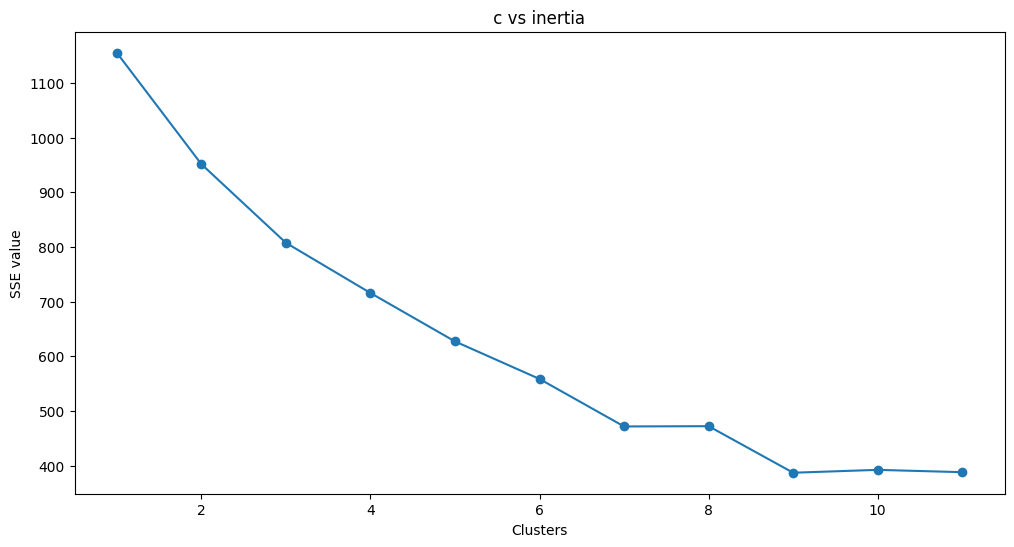

In [ ]:
sse = []
for cluster in range(1,12):
  km = KMeans(n_clusters = cluster, init = 'random')
  km.fit(data_scaled)
  sse.append(km.inertia_)


cluster = range(1,12)
sse = np.array(sse)
plt.figure(figsize=(12,6))
plt.plot(cluster, sse, marker = 'o')
plt.xlabel("Clusters")
plt.ylabel("SSE value")
plt.title(" c vs inertia ")
# # Converting the results into a NumPy array and plotting them
# clusters = np.arange(1, 12)
# SSE = np.array(SSE)
# plt.figure(figsize=(12, 6))
# plt.plot(clusters, SSE, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()




## silhouette coefficeint

In [ ]:
from sklearn.metrics import silhouette_score
km = KMeans(n_clusters =4, init ='random')
km.fit(data_scaled)
pred = km.predict(data_scaled)

print("sil coeff with 4 clusters : ", silhouette_score(data_scaled, pred))


sil coeff with 4 clusters :  0.18981731262684604


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
## implement kmeans now

km = KMeans(n_clusters = 4, init = 'k-means++')
km.fit(data_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

## linear regression

In [99]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Generate 'random' data
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head()

xmean = np.mean(X)
ymean = np.mean(y)

df['xyconv'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean) **2


## calculate
beta = df['xyconv'].sum() / df['xvar'].sum()
alpha = ymean - beta * xmean

print(alpha, beta)
y_pred = alpha + beta*X
y_pred


,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


In [105]:
### linear regression and sse values

from sklearn.linear_model import LinearRegression

adv = pd.read_csv('Advertising.csv')
adv.head()

pred = ['TV']
X = adv[pred]
y = adv['Sales']
lm = LinearRegression()
model = lm.fit(X, y)

In [107]:
print(f"alpha : {lm.intercept_}")
print(f"beta : {lm.coef_}")

alpha : 7.032593549127695
beta : [0.04753664]


In [108]:
y_pred = lm.predict(X)

sse = np.sum((y-y_pred)**2)
print(f'sse : {sse}')

sse : 2102.5305831313512


TypeError: ignored

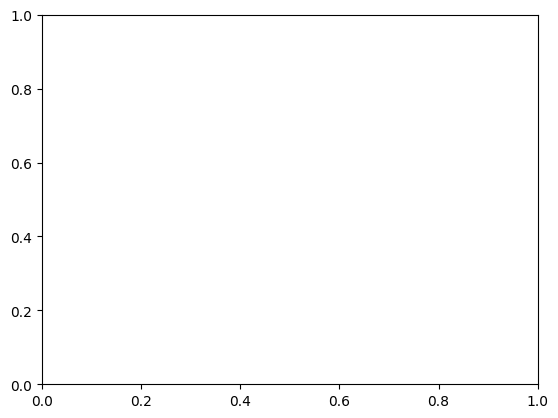

In [111]:
import matplotlib.pyplot as plt
# sse_values = [sse1, sse2, sse3]
# num_predictors = [1,2, 3]
sse = [sse]
num_pred = [1]
# plt.plot(num_predictors, sse_values, marker='o', color='blue', linestyle='-', markersize=8)

# plt.bar(num_predictors, sse_values, color='blue')
plt.xlabel('Number of Predictor Variables')
plt.ylabel('SSE')
plt.title('SSE vs. Number of Predictor Variables')
plt.xticks(num_pred)
plt.show()


In [93]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']


from sklearn import preprocessing

le = preprocessing.LabelEncoder()
weather_e = le.fit_transform(weather)
temp_e = le.fit_transform(temp)


In [94]:
label = le.fit_transform(play)
label

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [95]:
## combine

features = list(zip(weather_e, temp_e))
features = np.array(features)


In [98]:
from sklearn.naive_bayes import GaussianNB
### gb
gb = GaussianNB()
gb.fit(features, label)

predict = gb.predict([[0,2]])
print(predict)

[1]


## naive bayes

In [ ]:
# Importing necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Generating a synthetic dataset for binary classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Training the classifier on the training data
gnb.fit(X_train, y_train)

# Making predictions on the test data
y_pred = gnb.predict(X_test)

# Calculating the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.81

In [ ]:
# importing required libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# read the train and test dataset
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop('Survived',axis=1)
train_y = train_data['Survived']

# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

'''
Create the object of the Naive Bayes model
You can also add other parameters and test your code here
Some parameters are : var_smoothing
Documentation of sklearn GaussianNB:

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

 '''
model = GaussianNB()

# fit the model with the training data
model.fit(train_x,train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Shape of training data : (712, 25)
Shape of testing data : (179, 25)
Target on train data [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1

## PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from numpy.linalg import eig

df = pd.read_csv('cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [16]:
df.drop('name', axis = 1, inplace = True)

df['mfr'].value_counts()

df['type'].value_counts()

df["mfr"] = df["mfr"].replace({"K": 1, "G": 2, "P": 3, "Q": 4,
                    "R": 5, "N": 6, "A": 7})
df["type"] = df["type"].replace({"C": 0, "H": 1})


df.isna().sum()
## numpy array

df = df.to_numpy()

dft = df.transpose()
dft

product = np.matmul(df, dft)
product

eigen_value, eigen_vector = np.linalg.eig(product)
print(eigen_vector)
print(eigen_value)


## remove

eigen_vector = np.delete(eigen_vector, np.argmin(eigen_value), axis = 1)


print(df.shape)
print(eigen_vector.shape)


# insert in array

df = np.insert(df, [15], np.zeros((77, 62)), axis = 1)

print(df.shape)


## mul now possible
pca = np.matmul(df, eigen_vector)

u, s, v = np.linalg.svd(df, full_matrices = True)

print(u.shape)
print(s.shape)
print(v.shape)

print(u)
print(s)
print(v)

(77, 77)


In [76]:
###########################   2nd data

import numpy as np

df2 = pd.read_csv('ground_day.csv')
df2.head()

df2.drop(index = 131, axis = 0, inplace = True)

df2.dtypes

df2.drop('Punxsutawney Phil', axis = 1, inplace = True)
df2['Year'] = df2['Year'].astype('float64')

df2.isna().sum()
df2 = df2.fillna(df.mean())

arr2 = df2.to_numpy()
arr2

arr2t = arr2.transpose()
arr2t


matrix_rank = np.linalg.matrix_rank(A)


prod = np.matmul(arr2, arr2t)
prod

eigen_value, eigen_vector = np.linalg.eig(prod)
print(eigen_value)
print(eigen_vector)

## delete vectors lowest values

eigen_vector = np.delete(eigen_vector, np.argmin(eigen_value), axis = 1)

print(eigen_vector.shape)
print(arr2.shape)

## insert rows
arr2 = np.insert(arr2, [9], np.zeros((131, 122)), axis = 1)

print(eigen_vector.shape)
print(arr2.shape)

pca = np.matmul(arr2, eigen_vector)
pca

u, s, v = np.linalg.svd(arr2, full_matrices= True)
u.shape
s.shape
v.shape